In [1]:
import librosa
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
drive_base_path = '/content/drive/My Drive'
# contents of the UrbanSound8K directory
urbansound_path = os.path.join(drive_base_path, 'UrbanSound8K')
os.listdir(urbansound_path)


['FREESOUNDCREDITS.txt', 'UrbanSound8K_README.txt', 'metadata', 'audio']

In [5]:
# Defining the base path to the uploaded dataset
audio_path = os.path.join(urbansound_path, 'audio')

# List the contents of the audio directory
for fold in os.listdir(audio_path):
    print(fold)
    fold_path = os.path.join(audio_path, fold)
    if os.path.isdir(fold_path):
        for file in os.listdir(fold_path):
            print(file)


Streaming output truncated to the last 5000 lines.
122738-9-0-11.wav
121285-0-0-8.wav
121285-0-0-1.wav
121285-0-0-7.wav
121285-0-0-3.wav
122738-9-0-3.wav
124389-8-1-13.wav
124389-8-1-4.wav
124389-8-1-2.wav
124389-8-1-15.wav
124389-8-1-6.wav
124389-8-1-16.wav
124389-8-1-18.wav
124389-8-1-8.wav
124389-8-1-3.wav
124389-8-1-11.wav
125554-3-0-0.wav
124389-8-1-7.wav
124389-8-1-9.wav
124389-8-1-14.wav
124389-8-1-17.wav
124389-8-1-12.wav
124389-8-1-5.wav
128465-1-0-5.wav
125574-3-0-0.wav
128465-1-0-0.wav
129356-2-0-115.wav
129356-2-0-118.wav
128465-1-0-2.wav
129356-2-0-101.wav
128465-1-0-4.wav
128465-1-0-7.wav
128465-1-0-3.wav
128891-3-0-4.wav
128891-3-0-5.wav
129356-2-0-98.wav
128465-1-0-6.wav
129356-2-0-48.wav
128891-3-0-2.wav
128465-1-0-1.wav
129356-2-0-129.wav
128465-1-0-8.wav
129356-2-0-199.wav
132021-7-0-2.wav
131918-7-0-2.wav
132021-7-0-11.wav
131918-7-0-3.wav
132021-7-0-3.wav
132021-7-0-1.wav
131918-7-0-5.wav
132021-7-0-10.wav
131918-7-0-6.wav
131918-7-0-8.wav
132021-7-0-12.wav
132021-

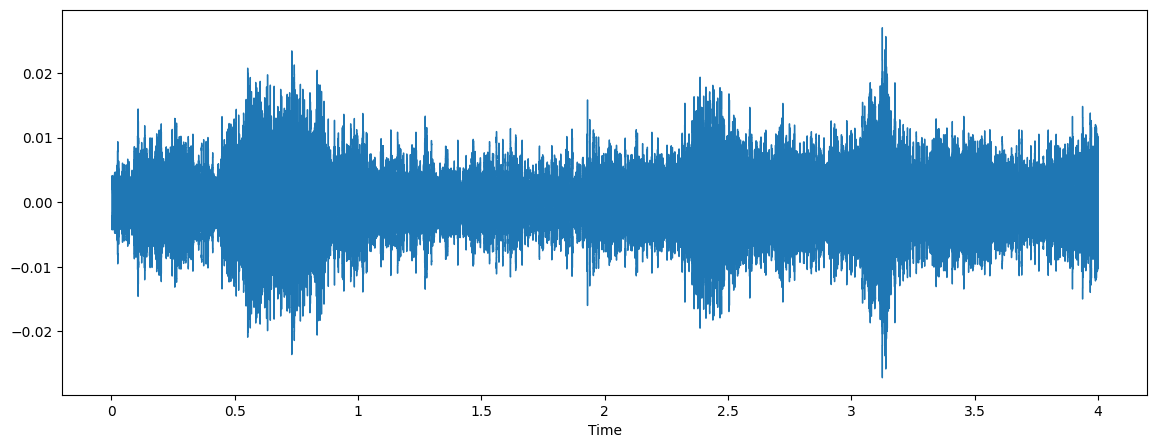

In [6]:
import IPython.display as ipd
import librosa.display
import numpy as np

#Choosing one audio file
filename = os.path.join(audio_path, 'fold5', '100263-2-0-117.wav')

plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

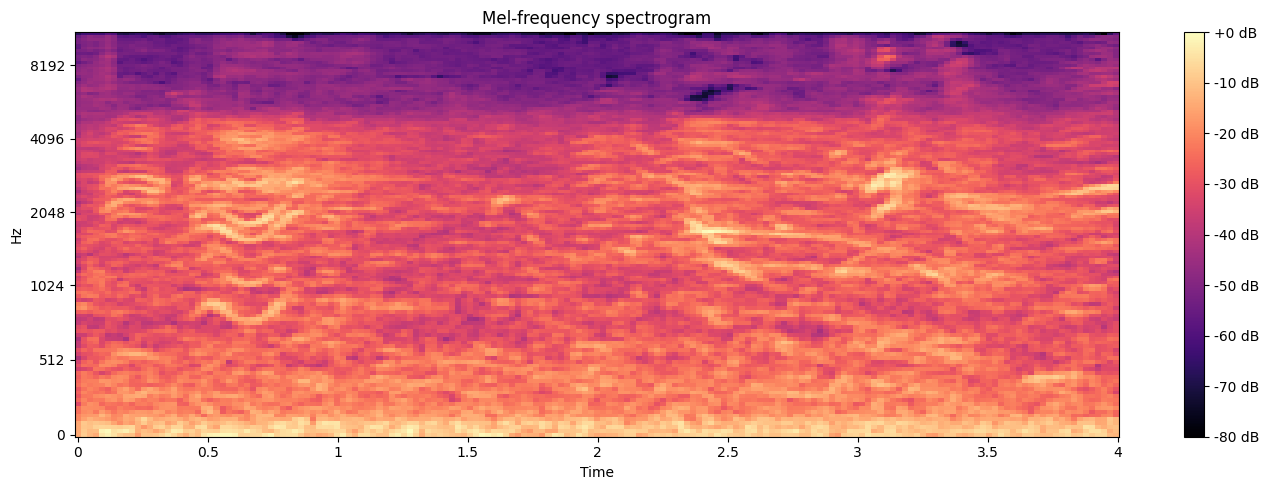

In [7]:
#Short-Time Fourier Transform (STFT)
D = np.abs(librosa.stft(data))**2

#spectrogram
S = librosa.feature.melspectrogram(S=D, sr=sample_rate)

# Converting to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

# Display
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


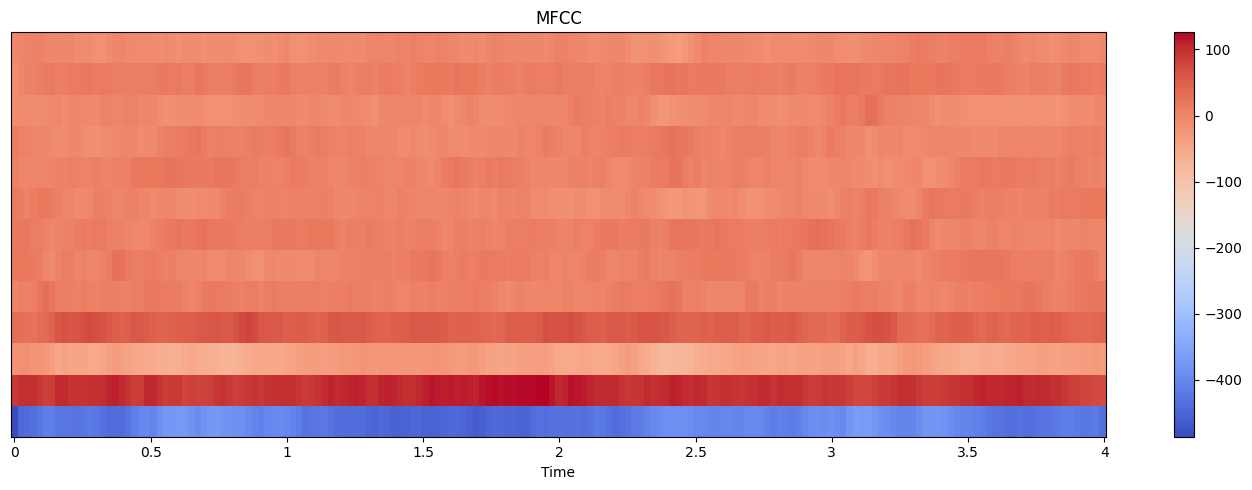

In [8]:
# Mel-frequency cepstral coefficients (MFCCs)
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [11]:
# Compute zero crossing rate
zero_crossings = librosa.zero_crossings(data, pad=False)
print(f'Number of zero crossings: {sum(zero_crossings)}')


Number of zero crossings: 12354


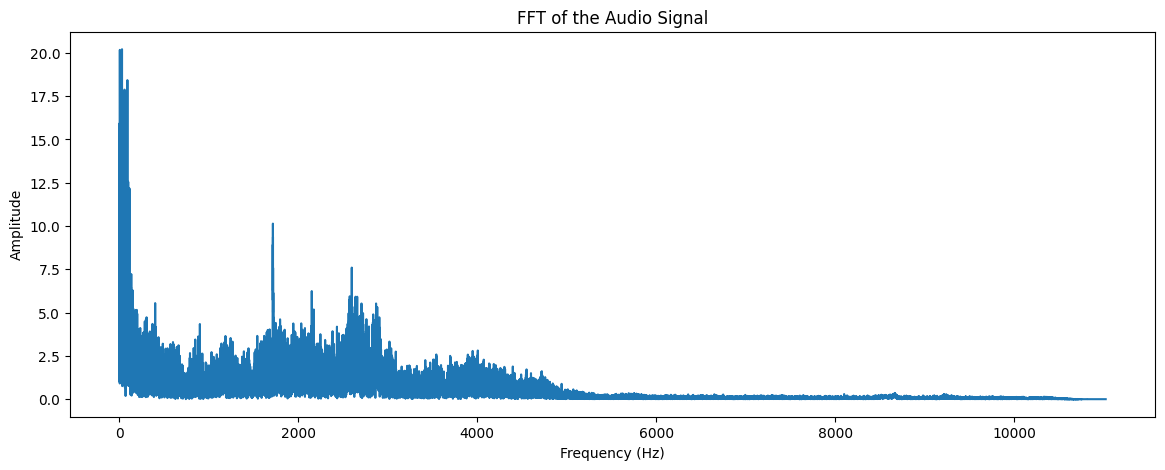

In [12]:
# Compute the FFT
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# Plot the FFT result
plt.figure(figsize=(14, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_result)[:len(fft_result)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of the Audio Signal')
plt.show()

In [13]:
# Define the path to the specific fold (e.g., fold5)
folder_path = '/content/drive/My Drive/UrbanSound8K/audio/fold5'

# Collect all audio files in the folder
audio_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.wav')]

print(f"Found {len(audio_files)} audio files in {folder_path}.")

Found 936 audio files in /content/drive/My Drive/UrbanSound8K/audio/fold5.


In [19]:
import pandas as pd

# Path to the metadata CSV file
metadata_path = '/content/drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv'

# Load the metadata into a pandas DataFrame
metadata = pd.read_csv(metadata_path)
metadata.head()


slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [21]:
print(metadata.columns)
print(metadata.head(10))


Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')
      slice_file_name    fsID      start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1  100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2  100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3  100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4  100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5  100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6  100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7    100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8   100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9    100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   


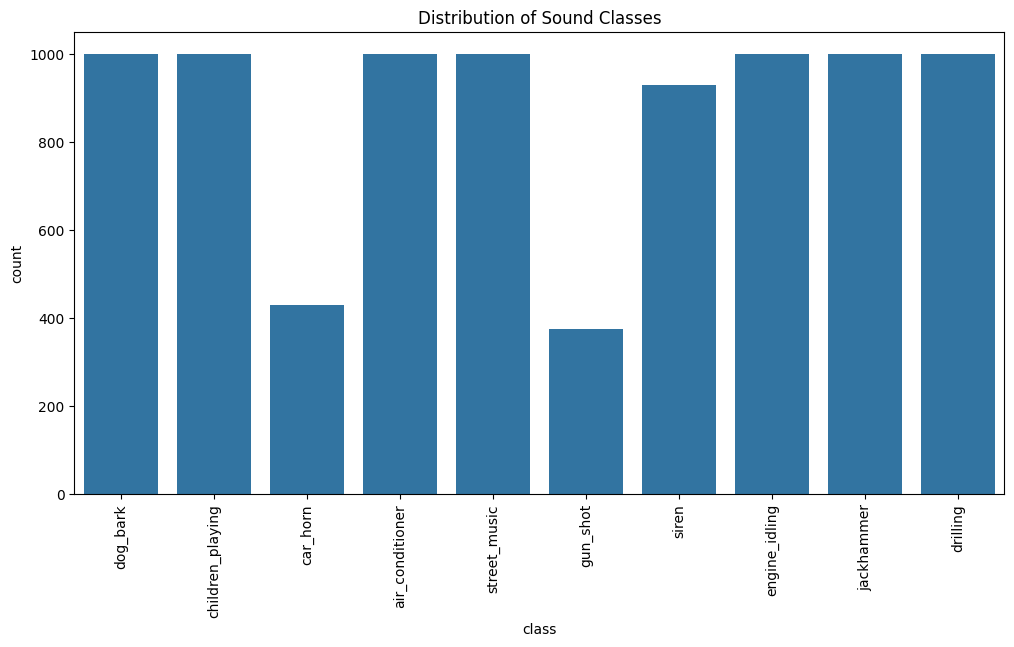

In [22]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='class')
plt.title('Distribution of Sound Classes')
plt.xticks(rotation=90)
plt.show()


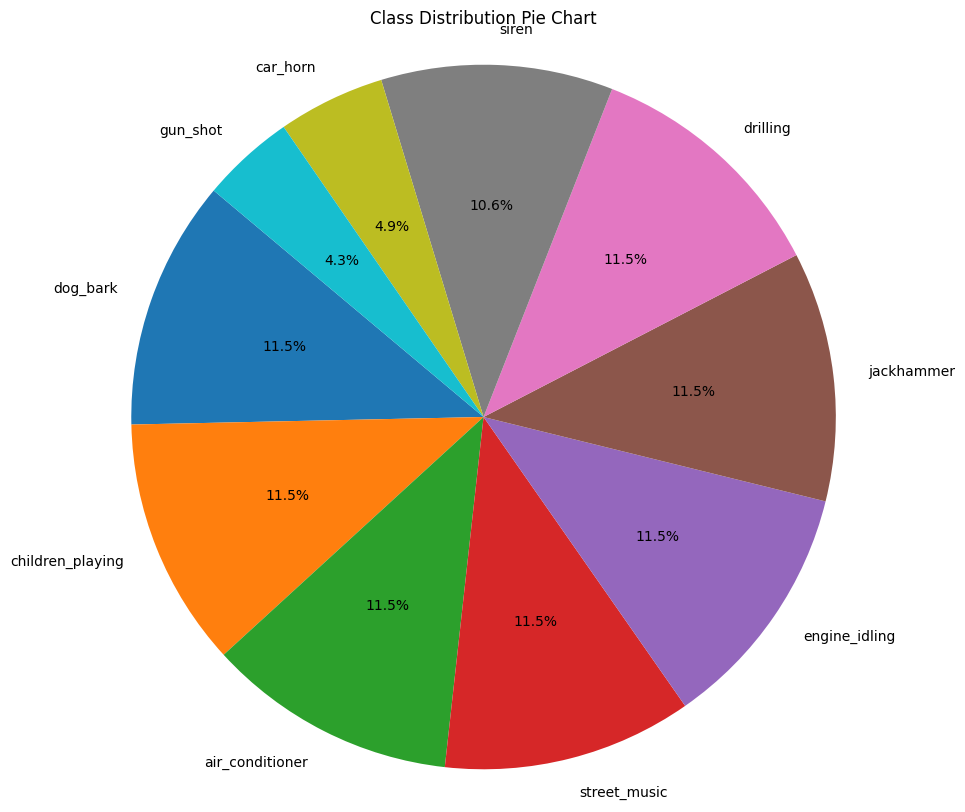

In [36]:
# Class Distribution Pie Chart
class_distribution = metadata['class'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution Pie Chart')
plt.axis('equal')  #to make it a circle
plt.show()


In [25]:
#Computing duration
metadata['duration'] = metadata['end'] - metadata['start']
print(metadata.head())

# plt.figure(figsize=(12, 6))
# sns.histplot(metadata['duration'], bins=50, kde=True)
# plt.title('Distribution of Audio File Durations')
# plt.xlabel('Duration (seconds)')
# plt.show()


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  duration  
0          dog_bark  0.317551  
1  children_playing  4.000000  
2  children_playing  4.000000  
3  children_playing  4.000000  
4  children_playing  4.000000  


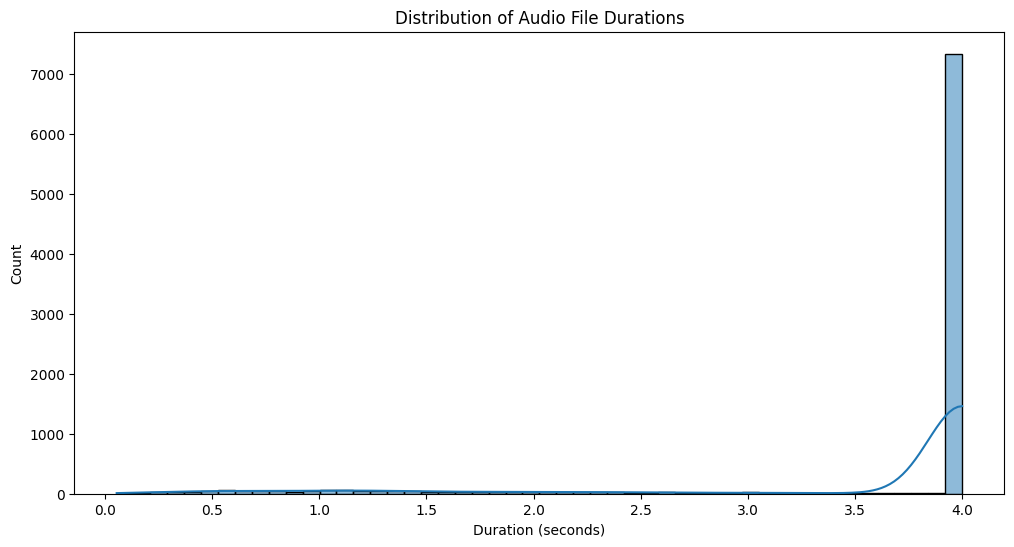

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(metadata['duration'], bins=50, kde=True)
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.show()


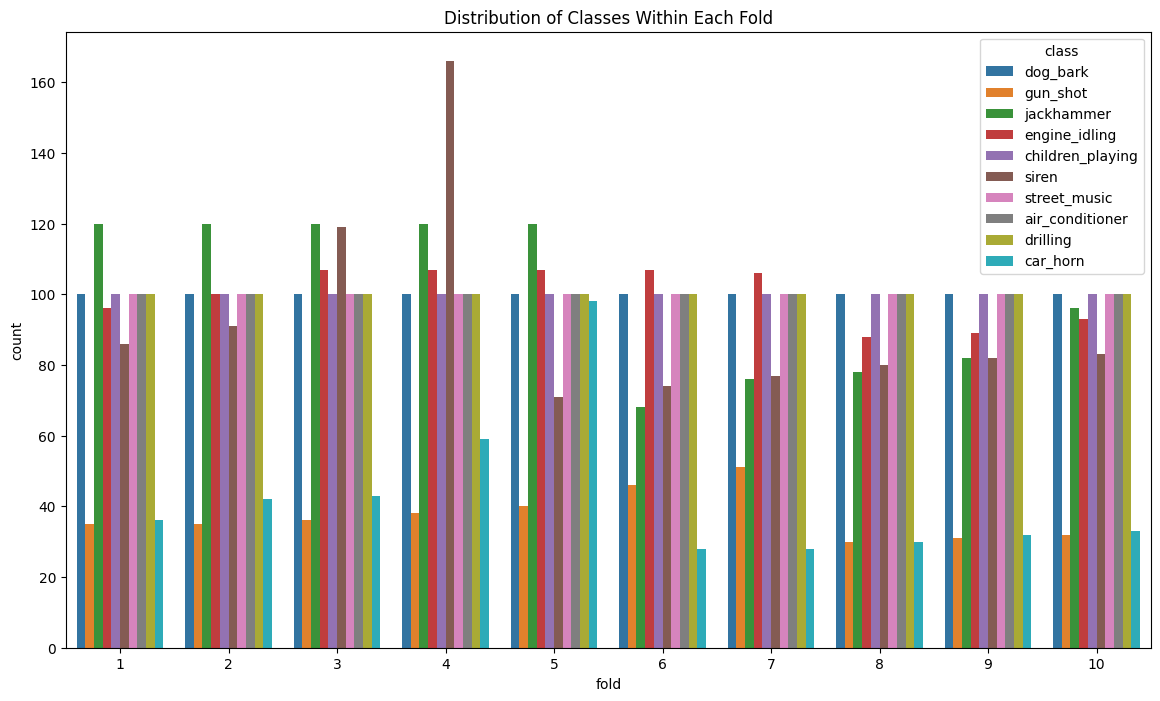

In [27]:
plt.figure(figsize=(14, 8))
sns.countplot(data=metadata, x='fold', hue='class')
plt.title('Distribution of Classes Within Each Fold')
plt.show()

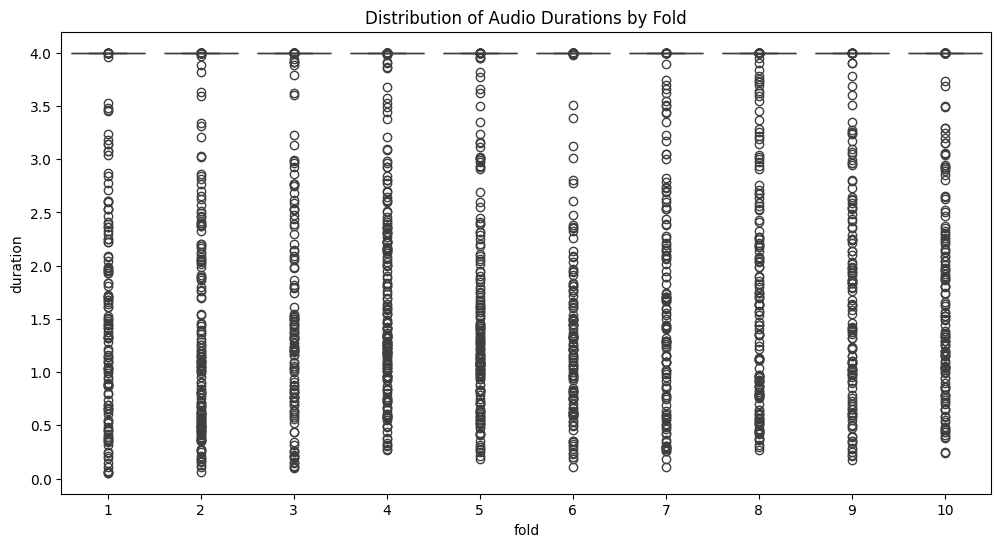

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=metadata, x='fold', y='duration')
plt.title('Distribution of Audio Durations by Fold')
plt.show()


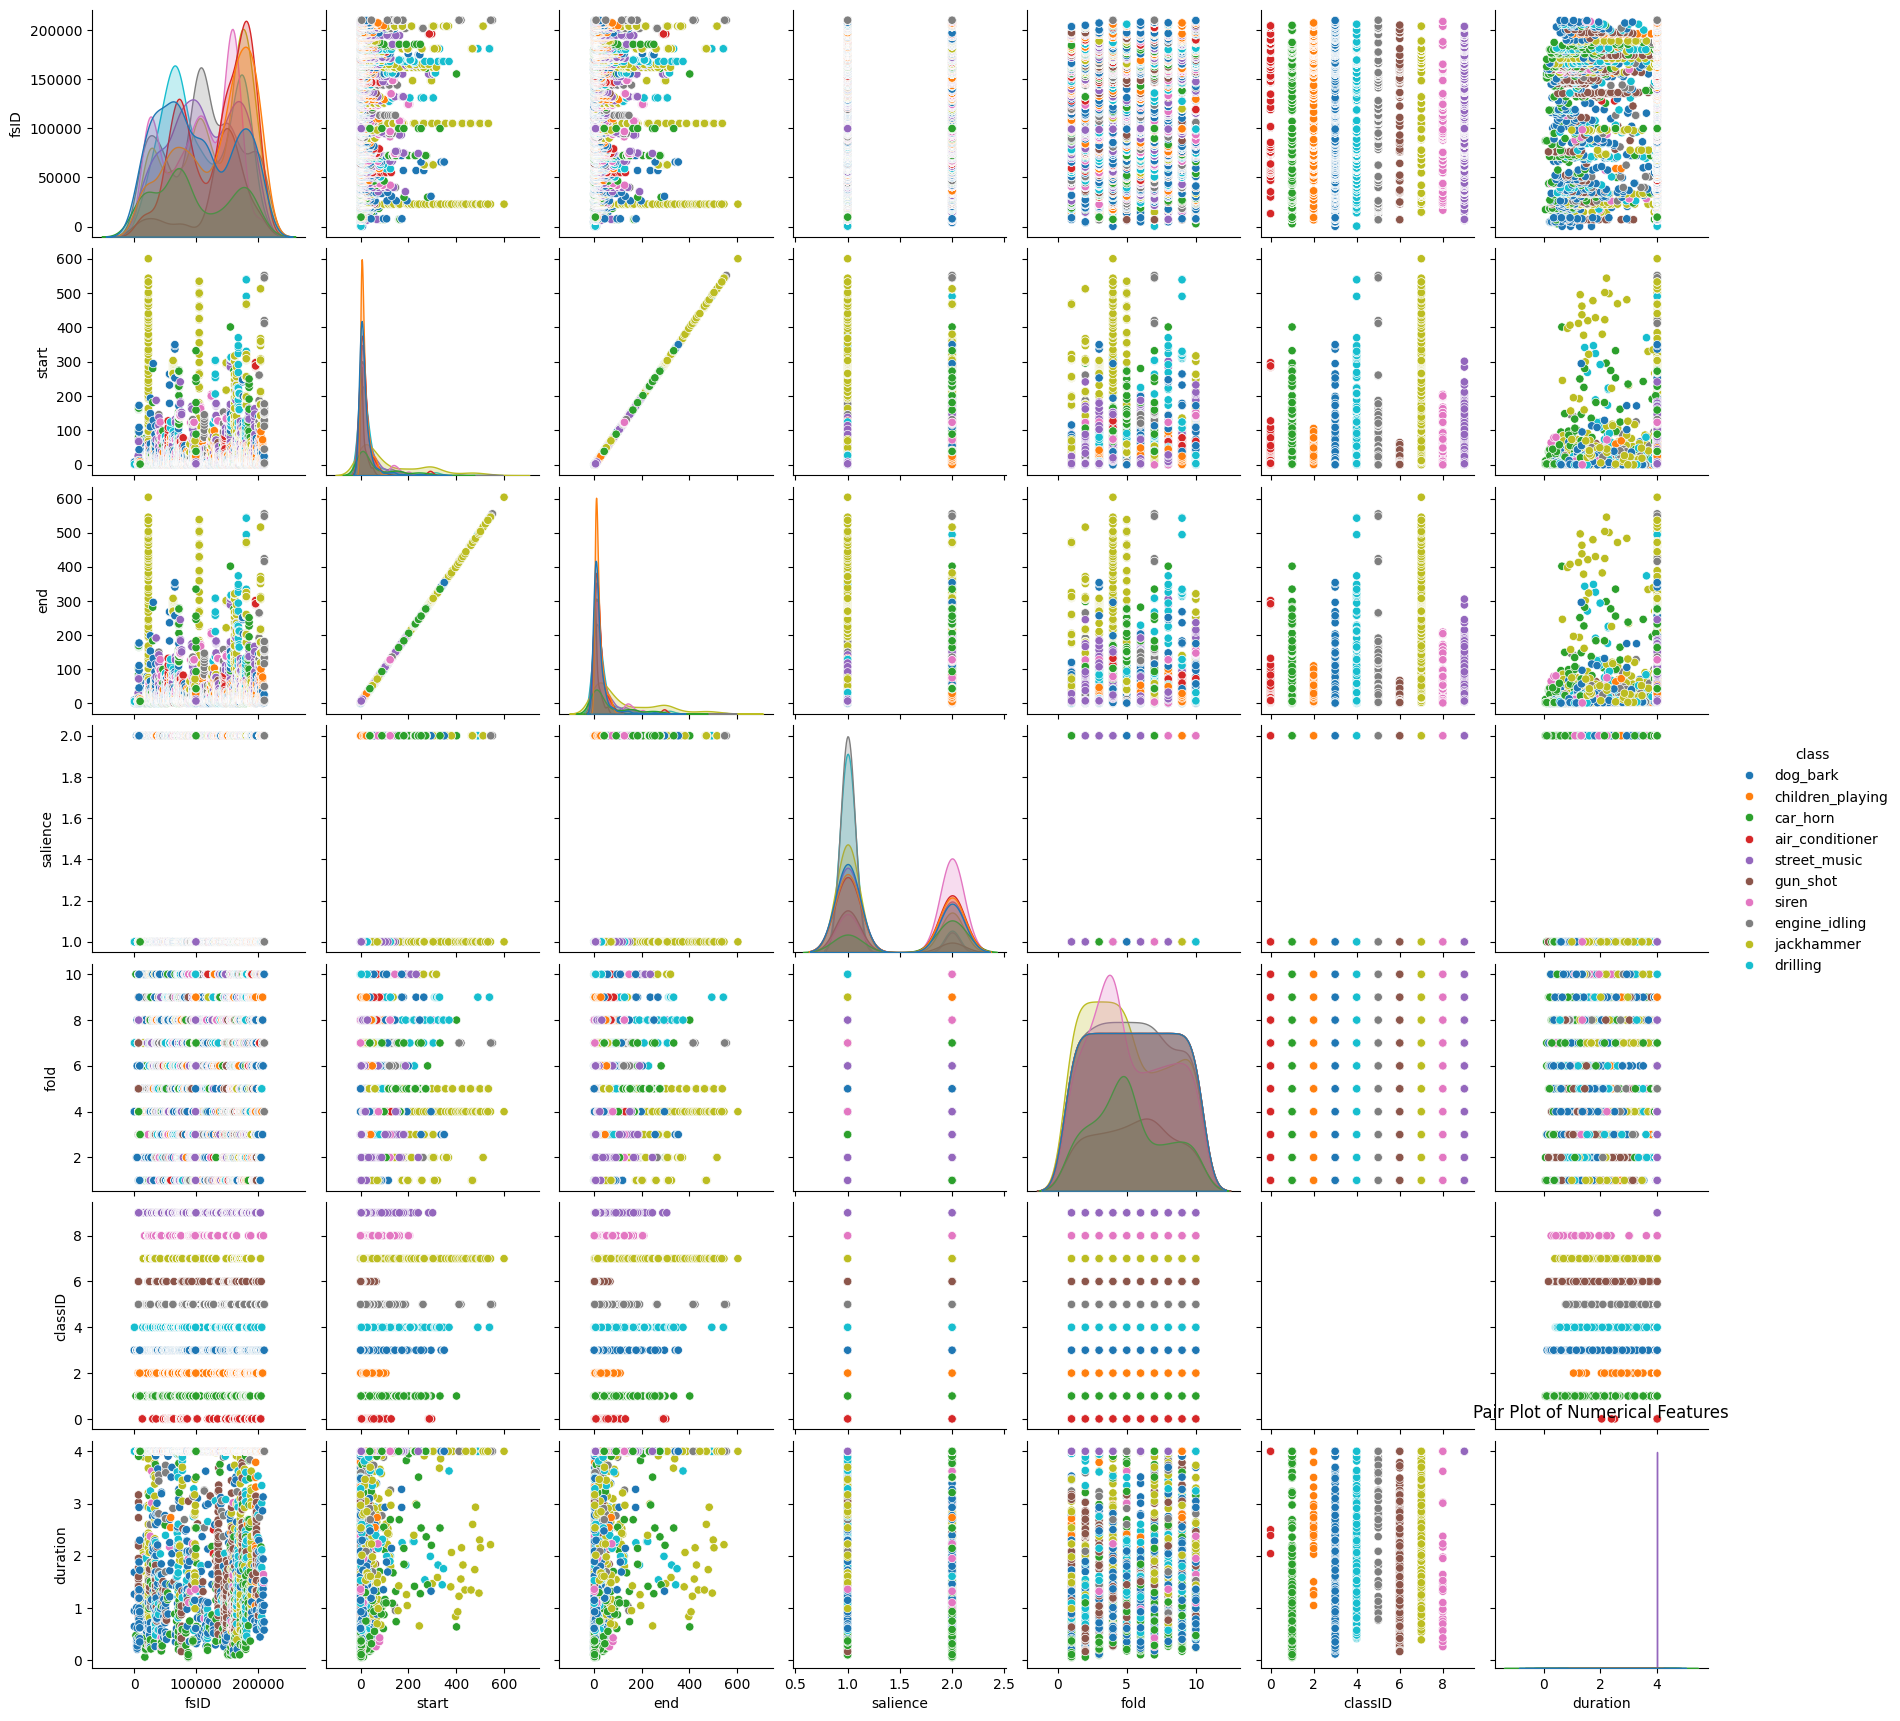

In [33]:
# Pair Plot of Numerical Features
sns.pairplot(metadata, hue='class')
plt.title('Pair Plot of Numerical Features')
plt.show()


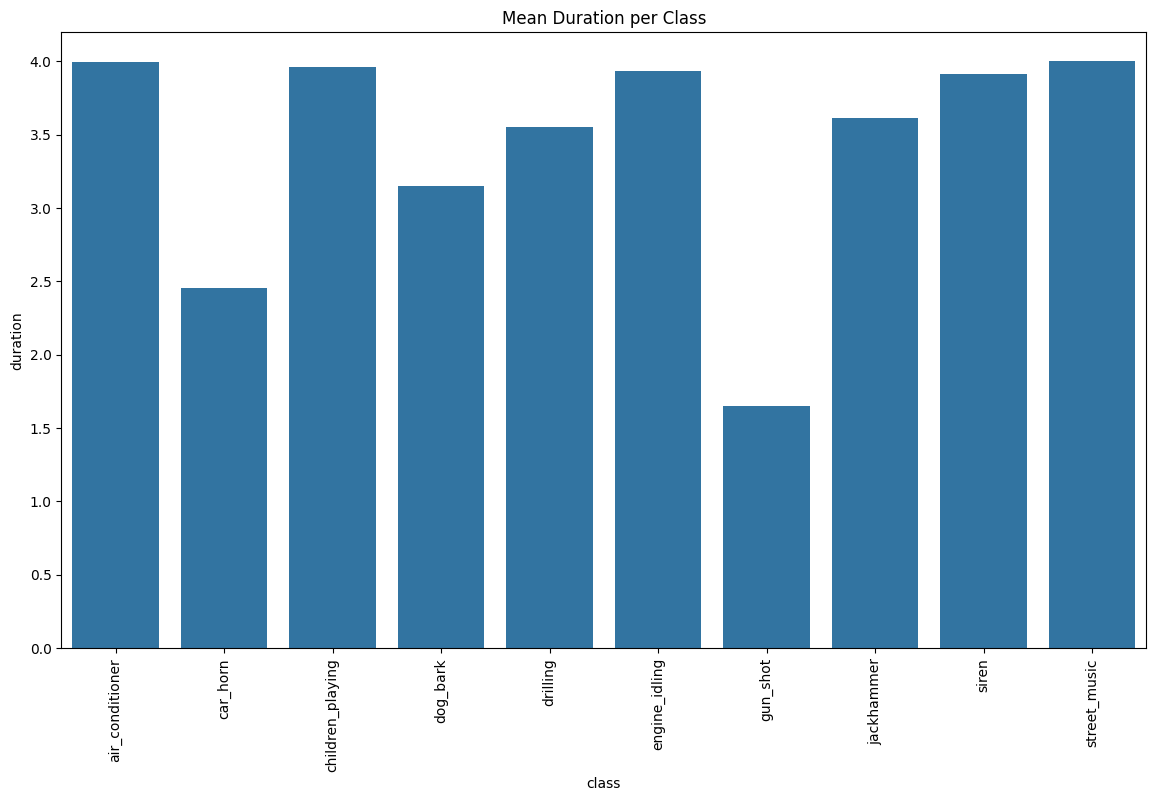

In [32]:
# Mean Duration per Class
plt.figure(figsize=(14, 8))
mean_duration_per_class = metadata.groupby('class')['duration'].mean().reset_index()
sns.barplot(data=mean_duration_per_class, x='class', y='duration')
plt.title('Mean Duration per Class')
plt.xticks(rotation=90)
plt.show()

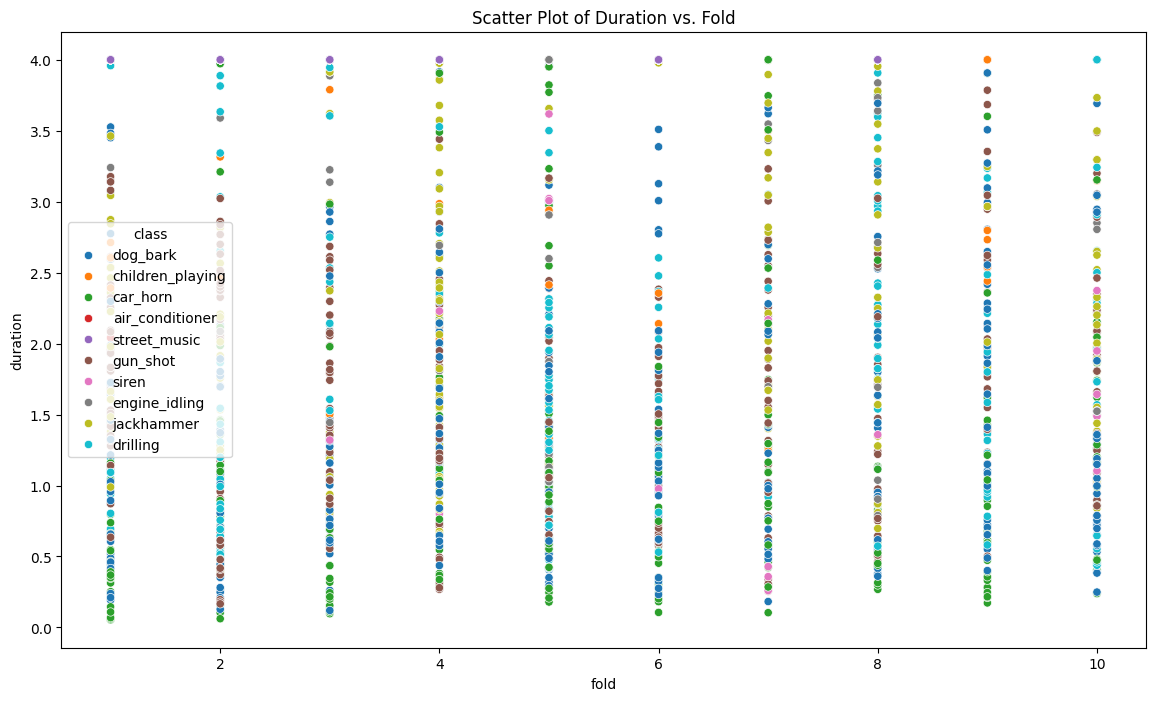

In [34]:
# Scatter Plot of Duration vs. Fold
plt.figure(figsize=(14, 8))
sns.scatterplot(data=metadata, x='fold', y='duration', hue='class')
plt.title('Scatter Plot of Duration vs. Fold')
plt.show()

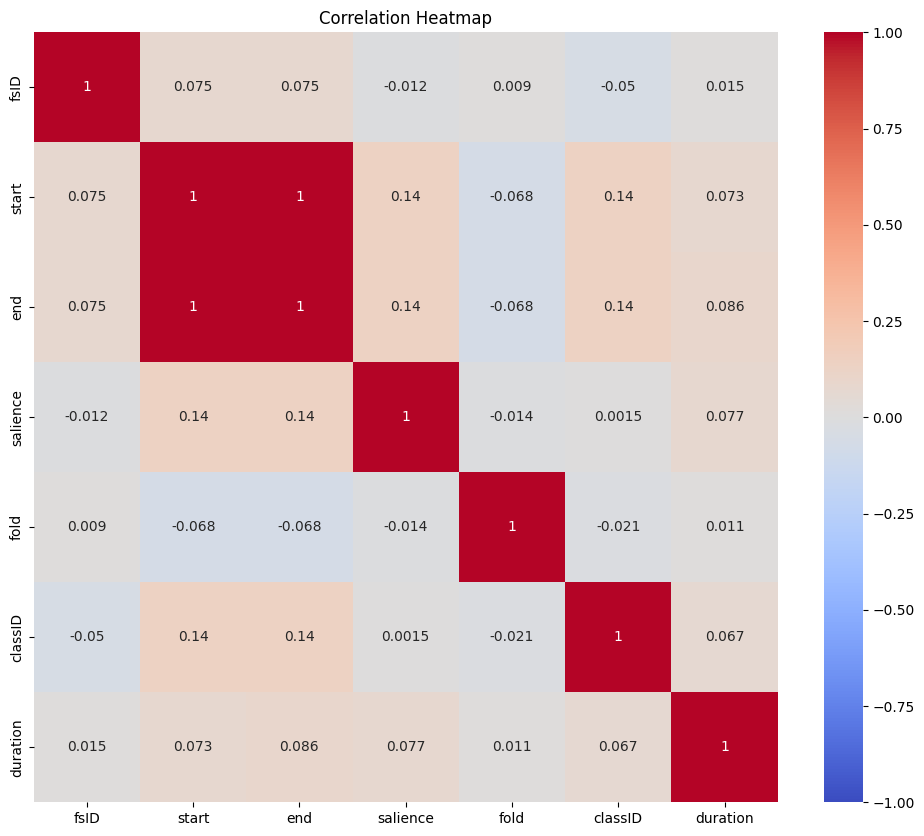

In [37]:
# Correlation Heatmap
# Selecting only the numeric columns
numeric_columns = metadata.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = metadata[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Note:
*Mel-Spectrogram* is computed by applying a Fourier transform to analyze the frequency content of a signal and to convert it to the mel-scale, while *MFCCs* are calculated with a discrete cosine transform (DCT) into a melfrequency spectrogram.

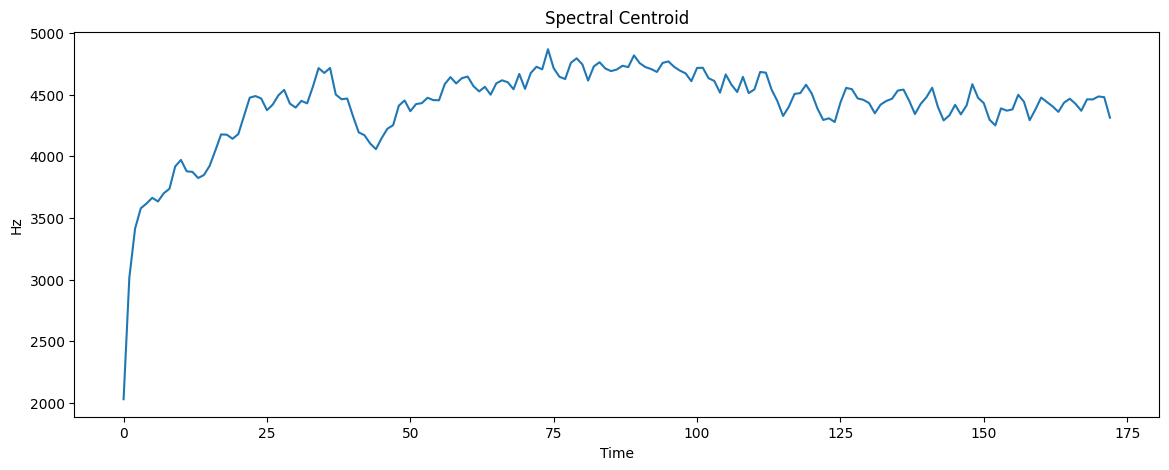

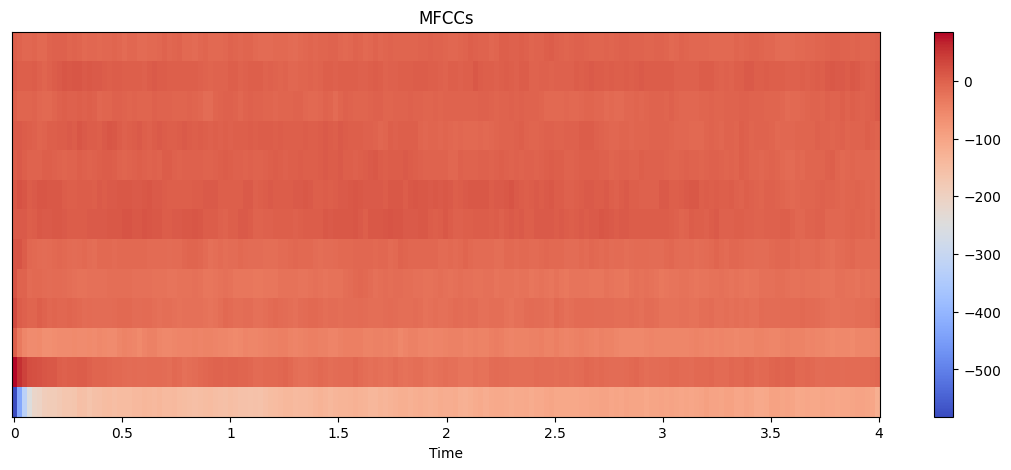

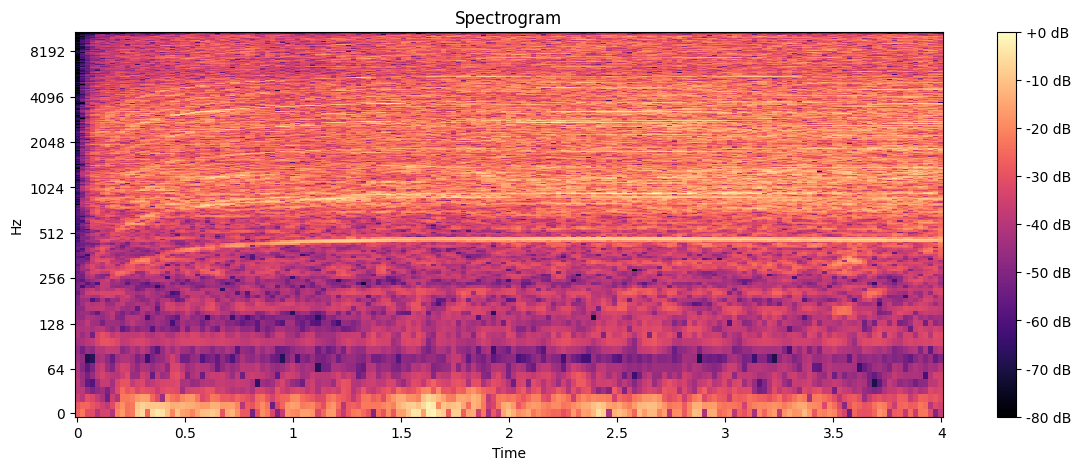

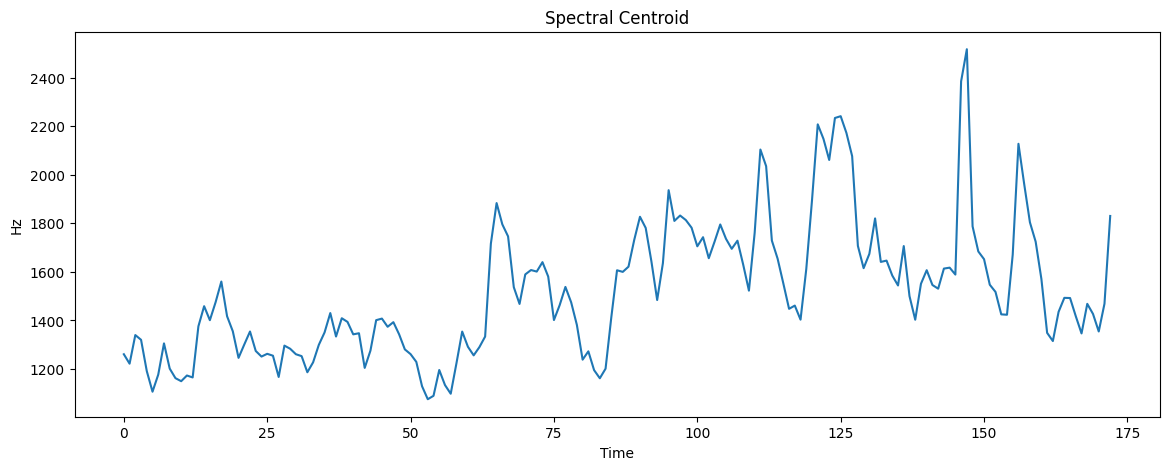

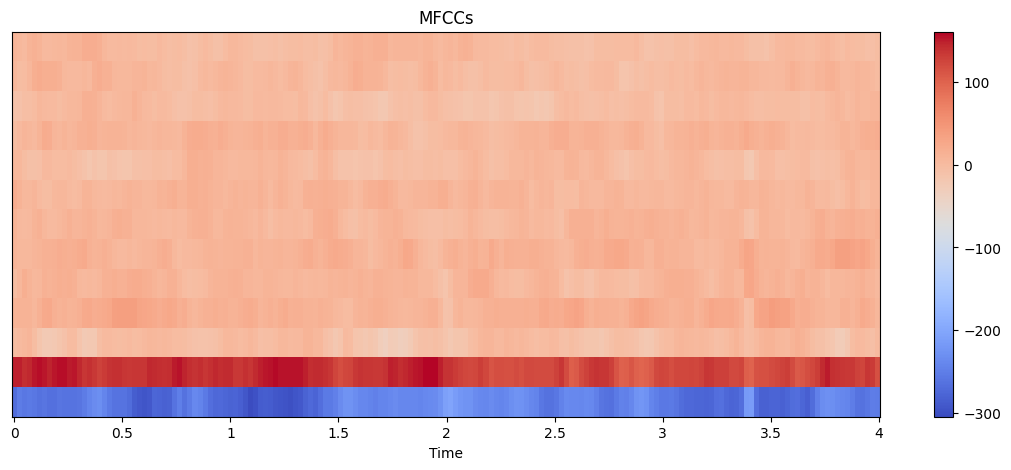

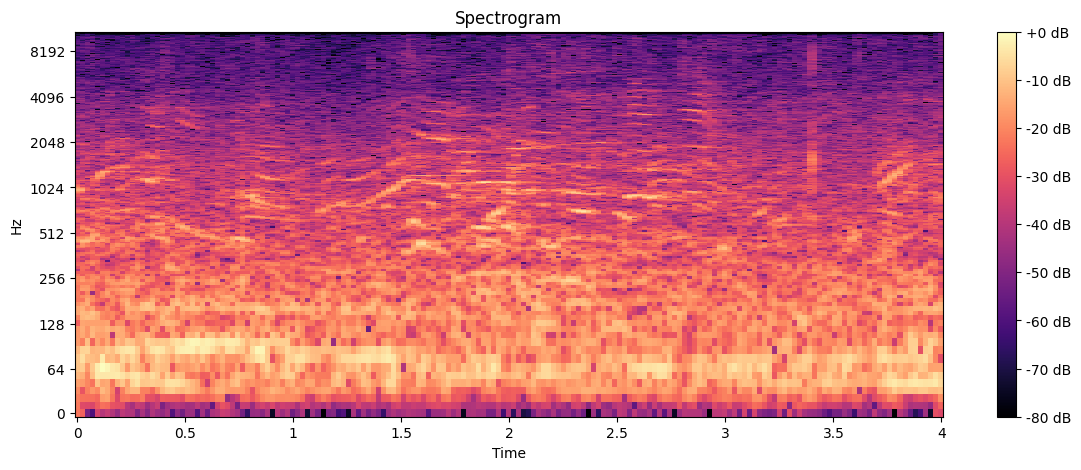

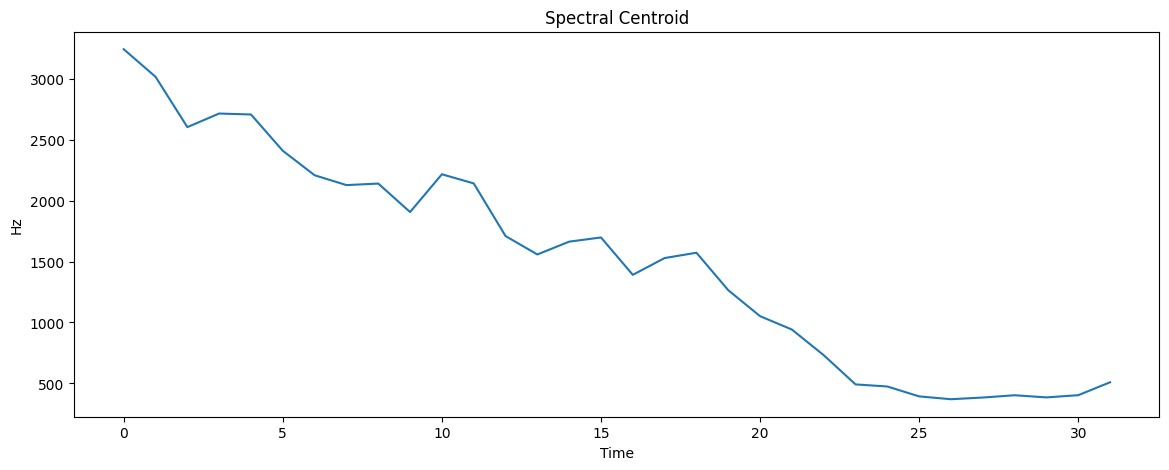

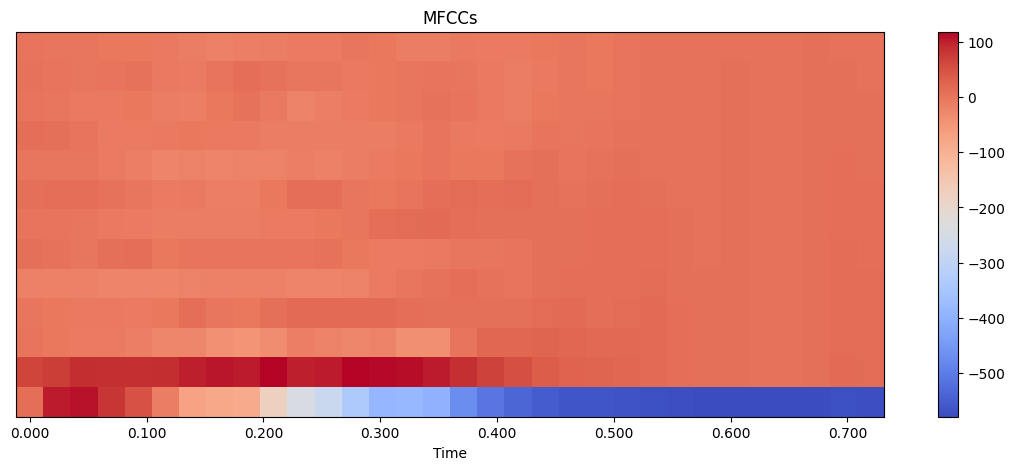

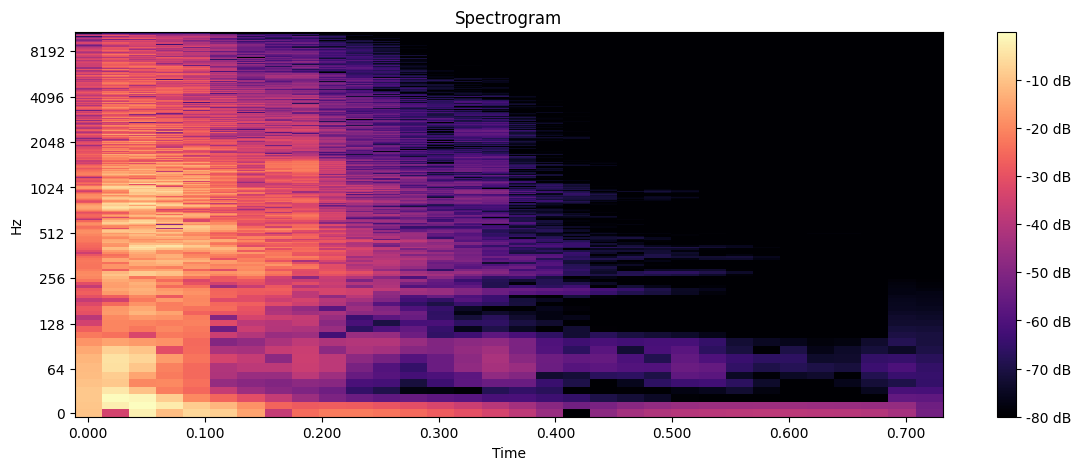

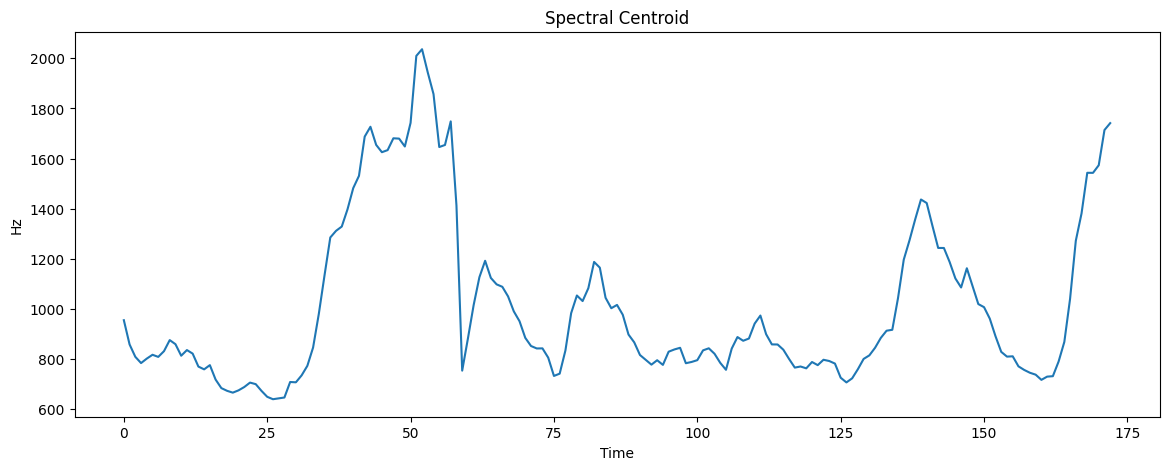

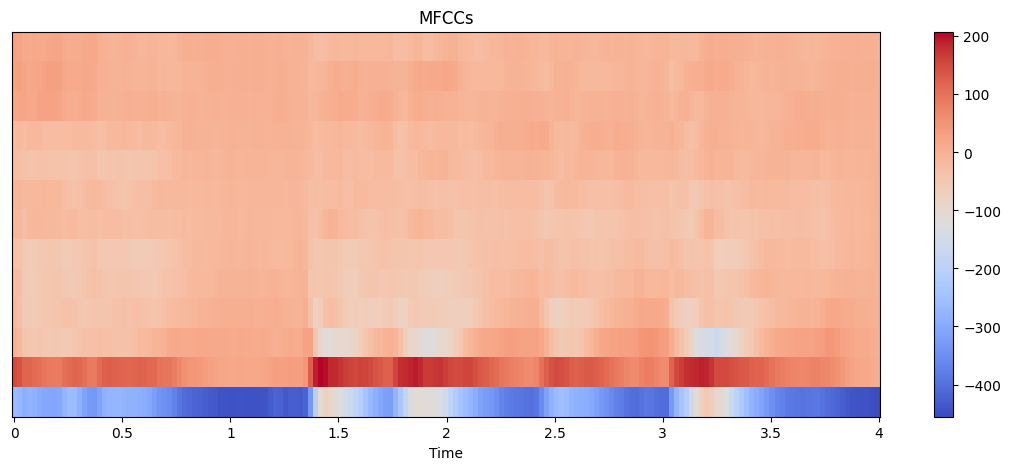

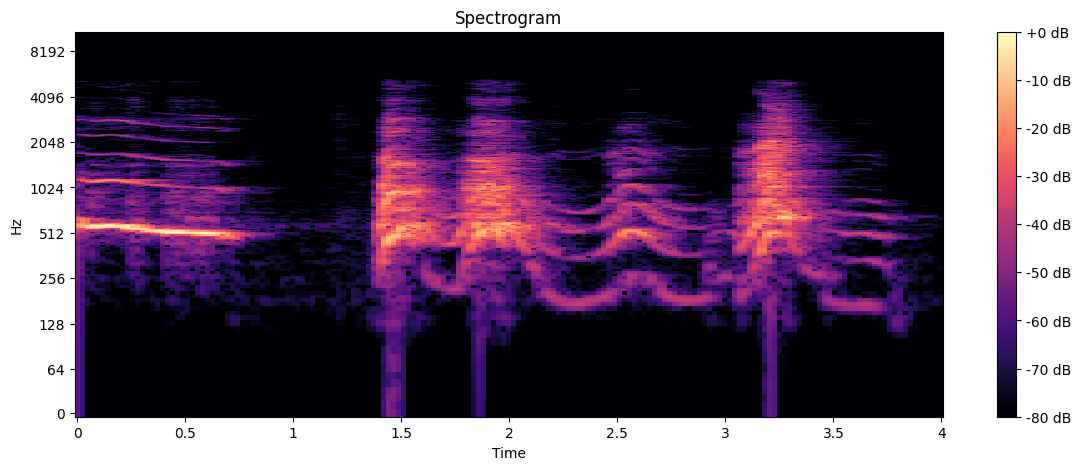

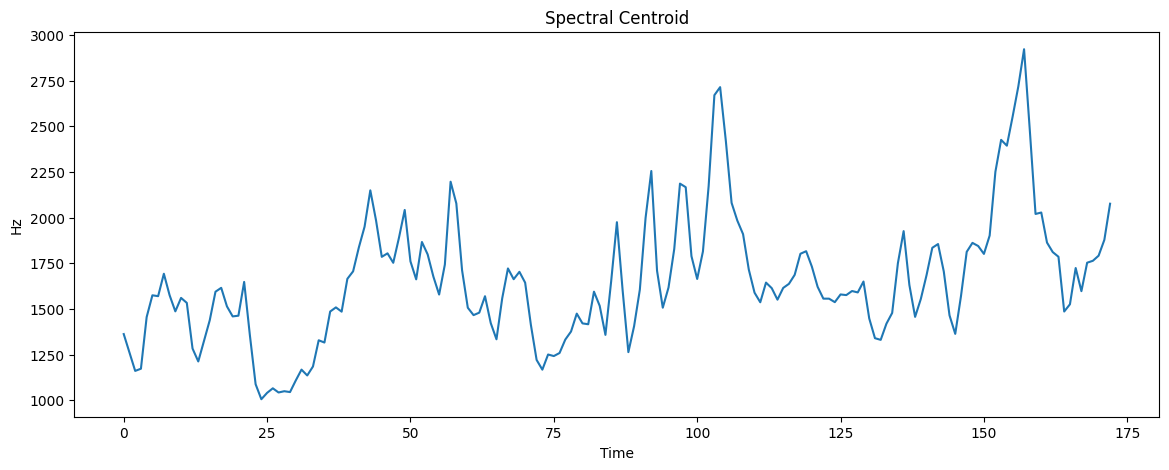

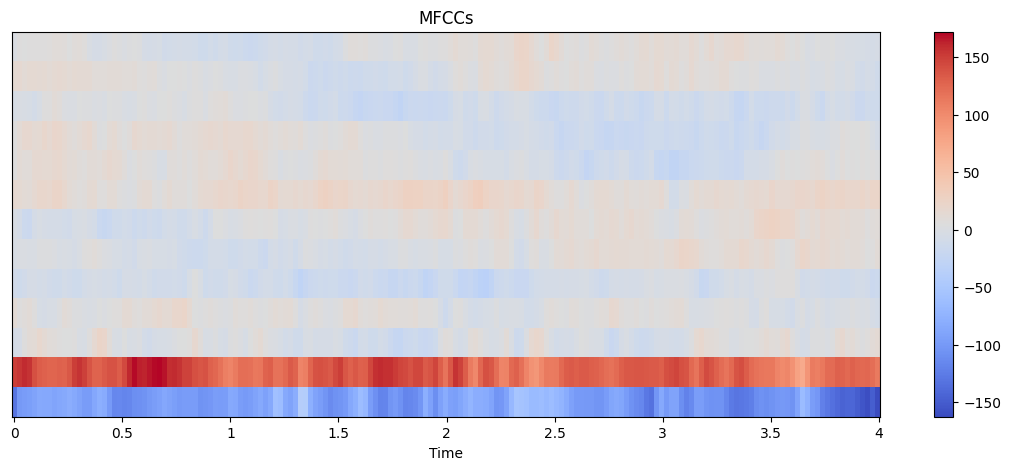

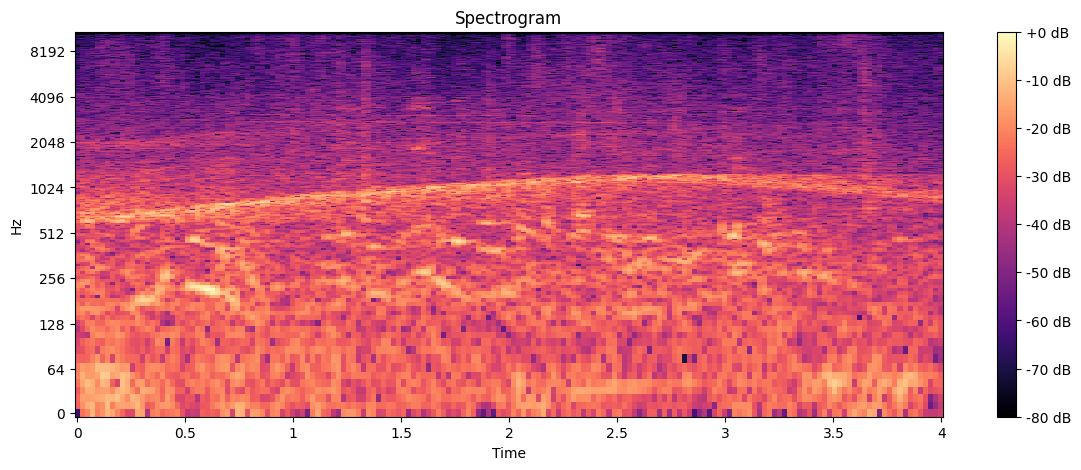

In [38]:
# Function to plot features for a single file
def plot_features(file_path):
    y, sr = librosa.load(file_path)

    # Spectral Centroid
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Spectrogram
    spectrogram = np.abs(librosa.stft(y))

    # Plot Spectral Centroid
    plt.figure(figsize=(14, 5))
    plt.plot(centroid.T, label='Spectral Centroid')
    plt.title('Spectral Centroid')
    plt.xlabel('Time')
    plt.ylabel('Hz')
    plt.show()

    # Plot MFCCs
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.show()

    # Plot Spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Plot features for a subset of files
subset_files = metadata.sample(n=5)
for _, row in subset_files.iterrows():
    file_path = os.path.join(audio_path, f'fold{row["fold"]}', row["slice_file_name"])
    plot_features(file_path)
